In [65]:
#Imports

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats


#Styling

%matplotlib inline 
sns.set_style ("whitegrid")


In [66]:
#Load datasets

adhd_data = pd.read_csv("/Users/angadh/Desktop/Nexus/adhd_2019_features_tfidf_256.csv")
autism_data = pd.read_csv("/Users/angadh/Desktop/Nexus/autism_2019_features_tfidf_256.csv")
anxiety_data = pd.read_csv("/Users/angadh/Desktop/Nexus/anxiety_2019_features_tfidf_256.csv")
bpd_data = pd.read_csv("/Users/angadh/Desktop/Nexus/bpd_2019_features_tfidf_256.csv")
depression_data = pd.read_csv("/Users/angadh/Desktop/Nexus/depression_2019_features_tfidf_256 (1).csv")
ED_data = pd.read_csv("/Users/angadh/Desktop/Nexus/EDAnonymous_2019_features_tfidf_256.csv")
health_data = pd.read_csv("/Users/angadh/Desktop/Nexus/healthanxiety_2019_features_tfidf_256.csv")
ptsd_data = pd.read_csv("/Users/angadh/Desktop/Nexus/ptsd_2019_features_tfidf_256.csv")
schizophrenia_data = pd.read_csv("/Users/angadh/Desktop/Nexus/schizophrenia_2019_features_tfidf_256 (1).csv")
social_anxiety_data = pd.read_csv("/Users/angadh/Desktop/Nexus/socialanxiety_2019_features_tfidf_256.csv")


In [67]:
#Take the first 1100 sets of data:

adhd_reduced = adhd_data.head(1100)
autism_reduced = autism_data.head(1100)
anxiety_reduced = anxiety_data.head(1100)
bpd_reduced = bpd_data.head(1100)
depression_reduced = depression_data.head(1100)
ED_reduced = ED_data.head(1100)
health_reduced = health_data.head(1100)
ptsd_reduced = ptsd_data.head(1100)
schizoprenia_reduced = schizophrenia_data.head(1100)
social_anxiety_reduced = social_anxiety_data.head(1100)



In [68]:
datasets = {
    'ADHD': adhd_reduced,
    'Autism': autism_reduced,
    'Anxiety': anxiety_reduced,
    'BPD': bpd_reduced,
    'Depression': depression_reduced,
    'ED': ED_reduced,
    'Health': health_reduced,
    'PTSD': ptsd_reduced,
    'Schizophrenia': schizoprenia_reduced,
    'Social_Anxiety': social_anxiety_reduced
}


### Automated Readibility Index Statistics

In [69]:
for name, dataset in datasets.items():
    mean = dataset['automated_readability_index'].mean()
    mode = dataset['automated_readability_index'].mode()[0]  # mode() returns a Series
    median = dataset['automated_readability_index'].median()
    iqr = stats.iqr(dataset['automated_readability_index'])
    sd = dataset['automated_readability_index'].std()
    var = dataset['automated_readability_index'].var()
    range_value = dataset['automated_readability_index'].max() - dataset['automated_readability_index'].min()
    skewness = dataset['automated_readability_index'].skew()
    kurtosis = dataset['automated_readability_index'].kurt()
    percentile_25 = np.percentile(dataset['automated_readability_index'], 25)
    percentile_75 = np.percentile(dataset['automated_readability_index'], 75)

    print(f" ARI Statistics for {name}:")
    print(f"Mean: {mean}")
    print(f"Mode: {mode}")
    print(f"Median: {median}")
    print(f"IQR: {iqr}")
    print(f"Standard Deviation: {sd}")
    print(f"Variance: {var}")
    print(f"Range: {range_value}")
    print(f"Skewness: {skewness}")
    print(f"Kurtosis: {kurtosis}")
    print(f"25th Percentile: {percentile_25}")
    print(f"75th Percentile: {percentile_75}")
    print()  


 ARI Statistics for ADHD:
Mean: 4.448992076777018
Mode: -0.375
Median: 4.118291666666666
IQR: 3.5492065086377593
Standard Deviation: 3.56685840127686
Variance: 12.722478854759316
Range: 68.68334343434343
Skewness: 6.006987055271964
Kurtosis: 87.17757308930015
25th Percentile: 2.4382223604098616
75th Percentile: 5.987428869047621

 ARI Statistics for Autism:
Mean: 5.200273248145942
Mode: 1.1834521575984986
Median: 4.548424535916062
IQR: 3.776879159430943
Standard Deviation: 4.418840812868056
Variance: 19.526154129468424
Range: 59.920273556230995
Skewness: 3.767044550689938
Kurtosis: 28.310896034972565
25th Percentile: 2.9764075900514593
75th Percentile: 6.7532867494824025

 ARI Statistics for Anxiety:
Mean: 3.9134520706722107
Mode: 1.5935357142857145
Median: 3.6278362290862294
IQR: 3.352651707085537
Standard Deviation: 3.698123567661622
Variance: 13.676117921694324
Range: 81.64
Skewness: 8.159377085984744
Kurtosis: 144.60712752329442
25th Percentile: 1.9668201751988437
75th Percentile: 

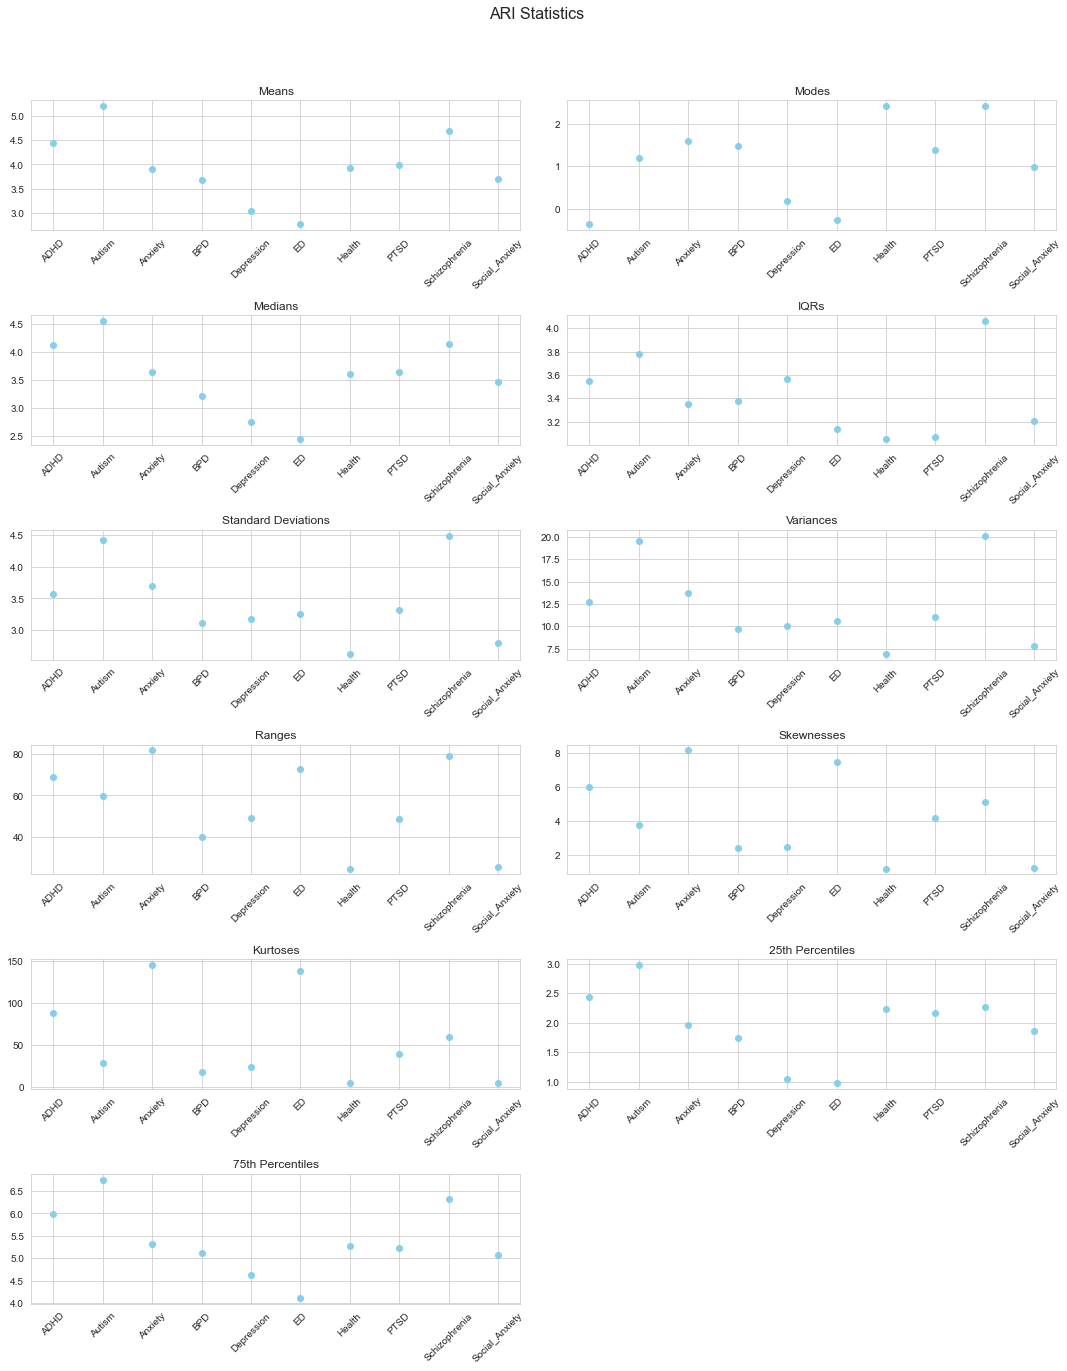

In [75]:
#Plotting on a graph:

# Initialize dictionaries for each statistic
means, modes, medians, iqrs, sds, vars, ranges, skewnesses, kurtoses, percentile_25s, percentile_75s = {}, {}, {}, {}, {}, {}, {}, {}, {}, {}, {}

# Calculate and store each statistic for each dataset
for name, dataset in datasets.items():
    means[name] = dataset['automated_readability_index'].mean()
    modes[name] = dataset['automated_readability_index'].mode()[0]
    medians[name] = dataset['automated_readability_index'].median()
    iqrs[name] = stats.iqr(dataset['automated_readability_index'])
    sds[name] = dataset['automated_readability_index'].std()
    vars[name] = dataset['automated_readability_index'].var()
    ranges[name] = dataset['automated_readability_index'].max() - dataset['automated_readability_index'].min()
    skewnesses[name] = dataset['automated_readability_index'].skew()
    kurtoses[name] = dataset['automated_readability_index'].kurt()
    percentile_25s[name] = np.percentile(dataset['automated_readability_index'], 25)
    percentile_75s[name] = np.percentile(dataset['automated_readability_index'], 75)

# Function to create a scatter plot for a statistic, as before
def create_plot(ax, data, title):
    names = list(data.keys())
    values = list(data.values())
    ax.scatter(range(len(names)), values, color='skyblue')
    ax.set_xticks(range(len(names)))
    ax.set_xticklabels(names, rotation=45)
    ax.set_title(title)

# Create a 6x2 grid of subplots
fig, axs = plt.subplots(6, 2, figsize=(15, 20))
create_plot(axs[0, 0], means, "Means")
create_plot(axs[0, 1], modes, "Modes")
create_plot(axs[1, 0], medians, "Medians")
create_plot(axs[1, 1], iqrs, "IQRs")
create_plot(axs[2, 0], sds, "Standard Deviations")
create_plot(axs[2, 1], vars, "Variances")
create_plot(axs[3, 0], ranges, "Ranges")
create_plot(axs[3, 1], skewnesses, "Skewnesses")
create_plot(axs[4, 0], kurtoses, "Kurtoses")
create_plot(axs[4, 1], percentile_25s, "25th Percentiles")
create_plot(axs[5, 0], percentile_75s, "75th Percentiles")

# Remove the last (empty) subplot
fig.delaxes(axs[5, 1])

# Add a main title to the figure
fig.suptitle("ARI Statistics", fontsize=16)

# Adjust layout to prevent overlap, taking into account the main title
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

plt.show()


### Coleman Liau Index Statistics

In [70]:
for name, dataset in datasets.items():
    mean = dataset['coleman_liau_index'].mean()
    mode = dataset['coleman_liau_index'].mode()[0]  
    median = dataset['coleman_liau_index'].median()
    iqr = stats.iqr(dataset['coleman_liau_index'])
    sd = dataset['coleman_liau_index'].std()
    var = dataset['coleman_liau_index'].var()
    range_value = dataset['coleman_liau_index'].max() - dataset['coleman_liau_index'].min()
    skewness = dataset['coleman_liau_index'].skew()
    kurtosis = dataset['coleman_liau_index'].kurt()
    percentile_25 = np.percentile(dataset['coleman_liau_index'], 25)
    percentile_75 = np.percentile(dataset['coleman_liau_index'], 75)

    print(f" Coleman Liau Statistics for {name}:")
    print(f"Mean: {mean}")
    print(f"Mode: {mode}")
    print(f"Median: {median}")
    print(f"IQR: {iqr}")
    print(f"Standard Deviation: {sd}")
    print(f"Variance: {var}")
    print(f"Range: {range_value}")
    print(f"Skewness: {skewness}")
    print(f"Kurtosis: {kurtosis}")
    print(f"25th Percentile: {percentile_25}")
    print(f"75th Percentile: {percentile_75}")
    print()  


 Coleman Liau Statistics for ADHD:
Mean: 5.969433638251076
Mode: 3.186926464285716
Median: 5.656728393466578
IQR: 2.599019986762057
Standard Deviation: 3.810010755394692
Variance: 14.516181956223232
Range: 86.20749160370373
Skewness: 10.034886862526836
Kurtosis: 179.35719556830495
25th Percentile: 4.329176693303573
75th Percentile: 6.92819668006563

 Coleman Liau Statistics for Autism:
Mean: 6.795858425908739
Mode: 3.3963974390243936
Median: 6.142168872356093
IQR: 3.0005310064364856
Standard Deviation: 4.806428519363192
Variance: 23.101755111747842
Range: 69.51374722492403
Skewness: 5.05692007048652
Kurtosis: 41.05590648679558
25th Percentile: 4.711710033509166
75th Percentile: 7.712241039945652

 Coleman Liau Statistics for Anxiety:
Mean: 5.375014743187312
Mode: 3.2187614250000043
Median: 5.2305254277824975
IQR: 2.6932770364573764
Standard Deviation: 3.9111544802399374
Variance: 15.297129368300935
Range: 112.28550033333336
Skewness: 13.352999656424183
Kurtosis: 292.45118686405914
25th

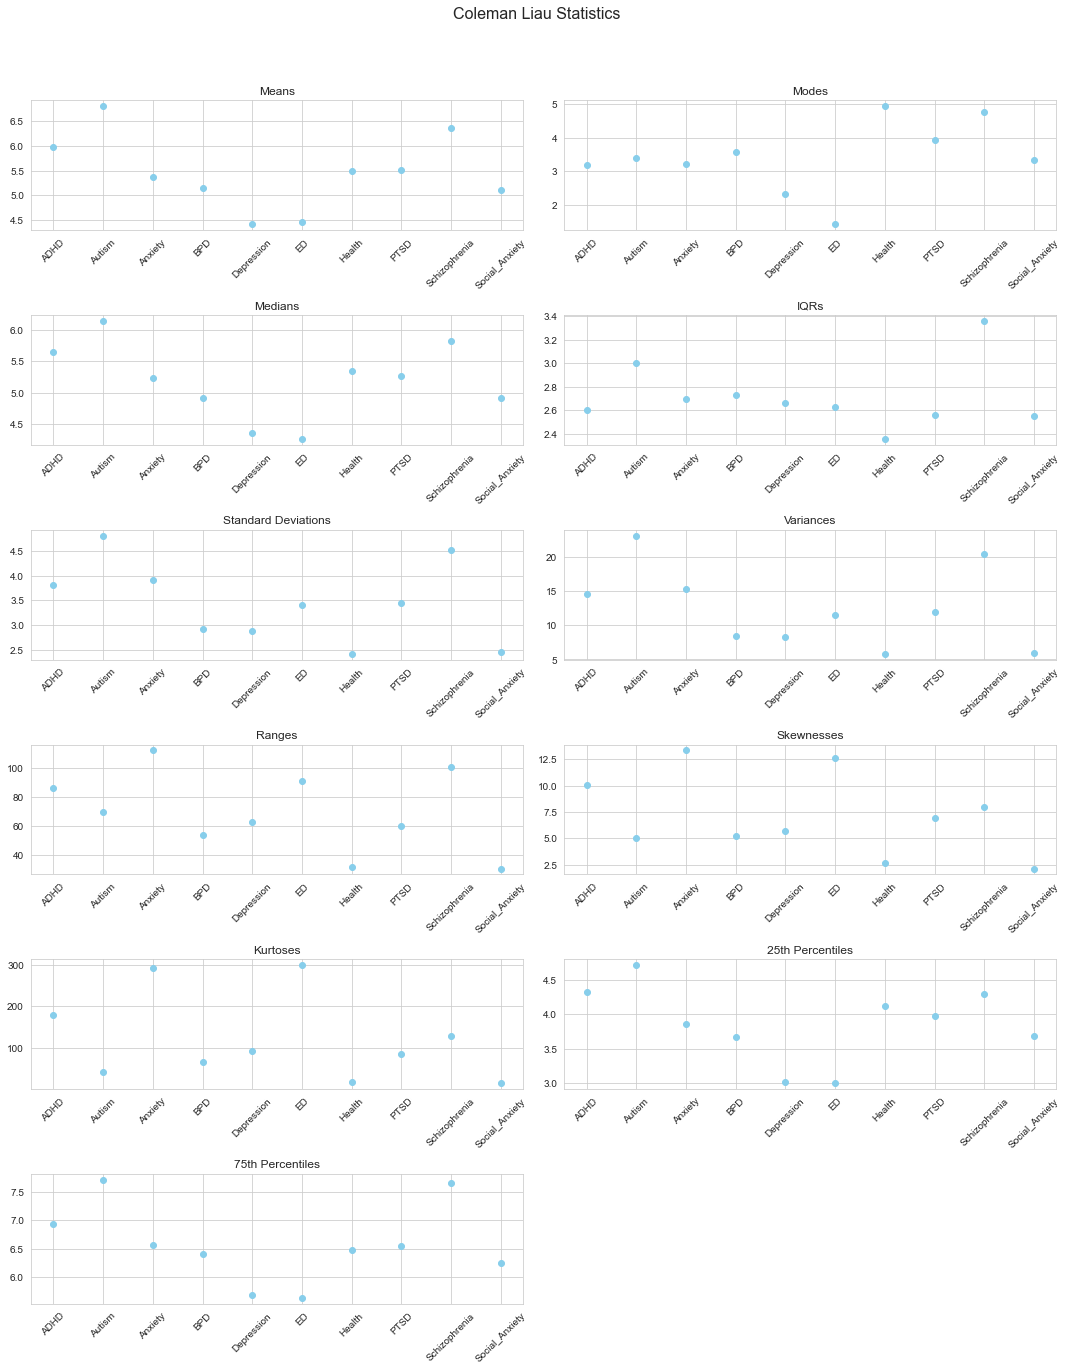

In [76]:
#Plotting:

#Plotting on a graph:

# Initialize dictionaries for each statistic
means, modes, medians, iqrs, sds, vars, ranges, skewnesses, kurtoses, percentile_25s, percentile_75s = {}, {}, {}, {}, {}, {}, {}, {}, {}, {}, {}

# Calculate and store each statistic for each dataset
for name, dataset in datasets.items():
    means[name] = dataset['coleman_liau_index'].mean()
    modes[name] = dataset['coleman_liau_index'].mode()[0]
    medians[name] = dataset['coleman_liau_index'].median()
    iqrs[name] = stats.iqr(dataset['coleman_liau_index'])
    sds[name] = dataset['coleman_liau_index'].std()
    vars[name] = dataset['coleman_liau_index'].var()
    ranges[name] = dataset['coleman_liau_index'].max() - dataset['coleman_liau_index'].min()
    skewnesses[name] = dataset['coleman_liau_index'].skew()
    kurtoses[name] = dataset['coleman_liau_index'].kurt()
    percentile_25s[name] = np.percentile(dataset['coleman_liau_index'], 25)
    percentile_75s[name] = np.percentile(dataset['coleman_liau_index'], 75)

# Function to create a scatter plot for a statistic, as before
def create_plot(ax, data, title):
    names = list(data.keys())
    values = list(data.values())
    ax.scatter(range(len(names)), values, color='skyblue')
    ax.set_xticks(range(len(names)))
    ax.set_xticklabels(names, rotation=45)
    ax.set_title(title)

# Create a 6x2 grid of subplots
fig, axs = plt.subplots(6, 2, figsize=(15, 20))
create_plot(axs[0, 0], means, "Means")
create_plot(axs[0, 1], modes, "Modes")
create_plot(axs[1, 0], medians, "Medians")
create_plot(axs[1, 1], iqrs, "IQRs")
create_plot(axs[2, 0], sds, "Standard Deviations")
create_plot(axs[2, 1], vars, "Variances")
create_plot(axs[3, 0], ranges, "Ranges")
create_plot(axs[3, 1], skewnesses, "Skewnesses")
create_plot(axs[4, 0], kurtoses, "Kurtoses")
create_plot(axs[4, 1], percentile_25s, "25th Percentiles")
create_plot(axs[5, 0], percentile_75s, "75th Percentiles")

# Remove the last (empty) subplot
fig.delaxes(axs[5, 1])

# Add a main title to the figure
fig.suptitle("Coleman Liau Statistics", fontsize=16)

# Adjust layout to prevent overlap, taking into account the main title
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

plt.show()


### Flesch Kincaid Grade Level Statistics

In [77]:
#Numerical Stats:

for name, dataset in datasets.items():
    mean = dataset['flesch_kincaid_grade_level'].mean()
    mode = dataset['flesch_kincaid_grade_level'].mode()[0]  
    median = dataset['flesch_kincaid_grade_level'].median()
    iqr = stats.iqr(dataset['flesch_kincaid_grade_level'])
    sd = dataset['flesch_kincaid_grade_level'].std()
    var = dataset['flesch_kincaid_grade_level'].var()
    range_value = dataset['flesch_kincaid_grade_level'].max() - dataset['flesch_kincaid_grade_level'].min()
    skewness = dataset['flesch_kincaid_grade_level'].skew()
    kurtosis = dataset['flesch_kincaid_grade_level'].kurt()
    percentile_25 = np.percentile(dataset['flesch_kincaid_grade_level'], 25)
    percentile_75 = np.percentile(dataset['flesch_kincaid_grade_level'], 75)

    print(f" Flesch Kincaid Grade Level for {name}:")
    print(f"Mean: {mean}")
    print(f"Mode: {mode}")
    print(f"Median: {median}")
    print(f"IQR: {iqr}")
    print(f"Standard Deviation: {sd}")
    print(f"Variance: {var}")
    print(f"Range: {range_value}")
    print(f"Skewness: {skewness}")
    print(f"Kurtosis: {kurtosis}")
    print(f"25th Percentile: {percentile_25}")
    print(f"75th Percentile: {percentile_75}")
    print()  

 Flesch Kincaid Grade Level for ADHD:
Mean: 5.333387444771696
Mode: 3.3547586206896547
Median: 5.155162117964707
IQR: 2.7440894187779437
Standard Deviation: 2.2286586079011963
Variance: 4.966919190572098
Range: 26.09638047138047
Skewness: 1.3002234692912467
Kurtosis: 7.2071272303034135
25th Percentile: 3.862590909090911
75th Percentile: 6.606680327868855

 Flesch Kincaid Grade Level for Autism:
Mean: 5.4605515590772375
Mode: 2.2800000000000007
Median: 5.172511980065172
IQR: 2.8678637473908593
Standard Deviation: 2.577615477342125
Variance: 6.644101549033673
Range: 28.88936170212766
Skewness: 1.4796769813633313
Kurtosis: 7.494703649389388
25th Percentile: 3.900169960474309
75th Percentile: 6.768033707865168

 Flesch Kincaid Grade Level for Anxiety:
Mean: 4.954432374267647
Mode: 1.4788793103448263
Median: 4.723925660546351
IQR: 2.5479268409401117
Standard Deviation: 2.124931788679821
Variance: 4.515335106542024
Range: 24.575
Skewness: 1.1190387562890889
Kurtosis: 4.617709732034514
25th P

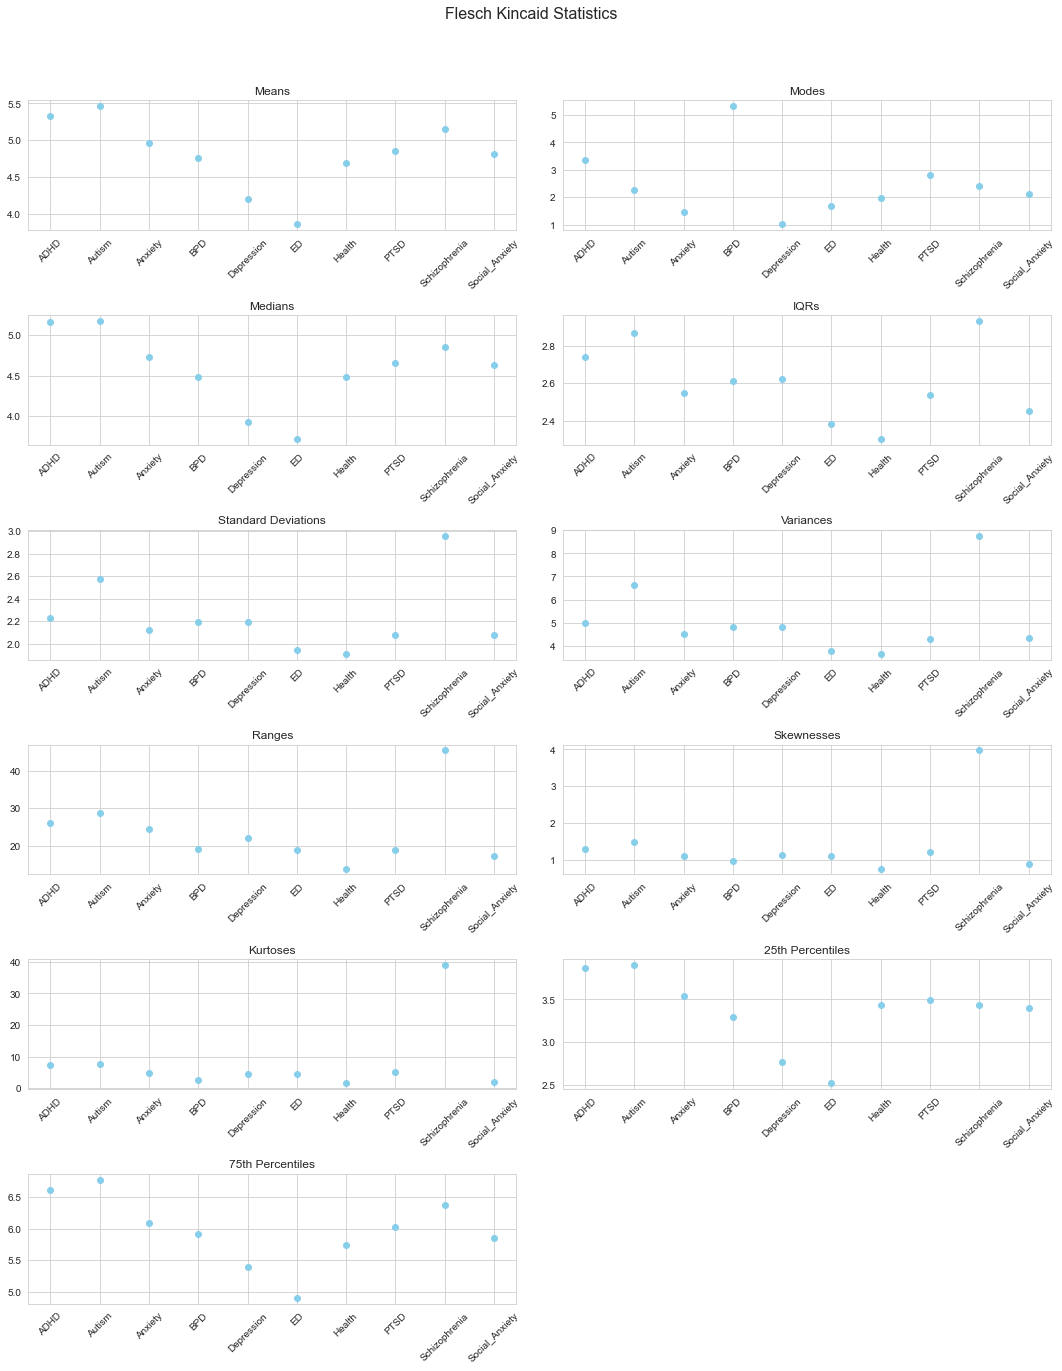

In [78]:
#Plotting:

#Plotting on a graph:

# Initialize dictionaries for each statistic
means, modes, medians, iqrs, sds, vars, ranges, skewnesses, kurtoses, percentile_25s, percentile_75s = {}, {}, {}, {}, {}, {}, {}, {}, {}, {}, {}

# Calculate and store each statistic for each dataset
for name, dataset in datasets.items():
    means[name] = dataset['flesch_kincaid_grade_level'].mean()
    modes[name] = dataset['flesch_kincaid_grade_level'].mode()[0]
    medians[name] = dataset['flesch_kincaid_grade_level'].median()
    iqrs[name] = stats.iqr(dataset['flesch_kincaid_grade_level'])
    sds[name] = dataset['flesch_kincaid_grade_level'].std()
    vars[name] = dataset['flesch_kincaid_grade_level'].var()
    ranges[name] = dataset['flesch_kincaid_grade_level'].max() - dataset['flesch_kincaid_grade_level'].min()
    skewnesses[name] = dataset['flesch_kincaid_grade_level'].skew()
    kurtoses[name] = dataset['flesch_kincaid_grade_level'].kurt()
    percentile_25s[name] = np.percentile(dataset['flesch_kincaid_grade_level'], 25)
    percentile_75s[name] = np.percentile(dataset['flesch_kincaid_grade_level'], 75)

# Function to create a scatter plot for a statistic, as before
def create_plot(ax, data, title):
    names = list(data.keys())
    values = list(data.values())
    ax.scatter(range(len(names)), values, color='skyblue')
    ax.set_xticks(range(len(names)))
    ax.set_xticklabels(names, rotation=45)
    ax.set_title(title)

# Create a 6x2 grid of subplots
fig, axs = plt.subplots(6, 2, figsize=(15, 20))
create_plot(axs[0, 0], means, "Means")
create_plot(axs[0, 1], modes, "Modes")
create_plot(axs[1, 0], medians, "Medians")
create_plot(axs[1, 1], iqrs, "IQRs")
create_plot(axs[2, 0], sds, "Standard Deviations")
create_plot(axs[2, 1], vars, "Variances")
create_plot(axs[3, 0], ranges, "Ranges")
create_plot(axs[3, 1], skewnesses, "Skewnesses")
create_plot(axs[4, 0], kurtoses, "Kurtoses")
create_plot(axs[4, 1], percentile_25s, "25th Percentiles")
create_plot(axs[5, 0], percentile_75s, "75th Percentiles")

# Remove the last (empty) subplot
fig.delaxes(axs[5, 1])

# Add a main title to the figure
fig.suptitle("Flesch Kincaid Statistics", fontsize=16)

# Adjust layout to prevent overlap, taking into account the main title
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

plt.show()

### Flesch Reading Ease Statistics

In [79]:
#Numerical Stats:

for name, dataset in datasets.items():
    mean = dataset['flesch_reading_ease'].mean()
    mode = dataset['flesch_reading_ease'].mode()[0]  
    median = dataset['flesch_reading_ease'].median()
    iqr = stats.iqr(dataset['flesch_reading_ease'])
    sd = dataset['flesch_reading_ease'].std()
    var = dataset['flesch_reading_ease'].var()
    range_value = dataset['flesch_reading_ease'].max() - dataset['flesch_reading_ease'].min()
    skewness = dataset['flesch_reading_ease'].skew()
    kurtosis = dataset['flesch_reading_ease'].kurt()
    percentile_25 = np.percentile(dataset['flesch_reading_ease'], 25)
    percentile_75 = np.percentile(dataset['flesch_reading_ease'], 75)

    print(f" Flesch Reading Ease for {name}:")
    print(f"Mean: {mean}")
    print(f"Mode: {mode}")
    print(f"Median: {median}")
    print(f"IQR: {iqr}")
    print(f"Standard Deviation: {sd}")
    print(f"Variance: {var}")
    print(f"Range: {range_value}")
    print(f"Skewness: {skewness}")
    print(f"Kurtosis: {kurtosis}")
    print(f"25th Percentile: {percentile_25}")
    print(f"75th Percentile: {percentile_75}")
    print()  

 Flesch Reading Ease for ADHD:
Mean: 79.65290597810295
Mode: 66.69509615384617
Median: 80.49784401959846
IQR: 12.212205299845792
Standard Deviation: 12.070132169353077
Variance: 145.688090585652
Range: 182.48310606060605
Skewness: -2.853278091718862
Kurtosis: 25.984356562893574
25th Percentile: 74.60295204281158
75th Percentile: 86.81515734265737

 Flesch Reading Ease for Autism:
Mean: 79.06896259002228
Mode: 82.02693023255813
Median: 80.83214285714288
IQR: 13.491369193269307
Standard Deviation: 14.042413334913773
Variance: 197.18937226856417
Range: 171.49999999999997
Skewness: -2.3371439651423844
Kurtosis: 14.4072214204678
25th Percentile: 73.65296973953704
75th Percentile: 87.14433893280635

 Flesch Reading Ease for Anxiety:
Mean: 82.04325829162448
Mode: 53.38818181818184
Median: 83.17559845782976
IQR: 12.02284764902538
Standard Deviation: 10.852118245076511
Variance: 117.76847040512249
Range: 171.73749999999998
Skewness: -2.4884146546181847
Kurtosis: 23.829603050098534
25th Percenti

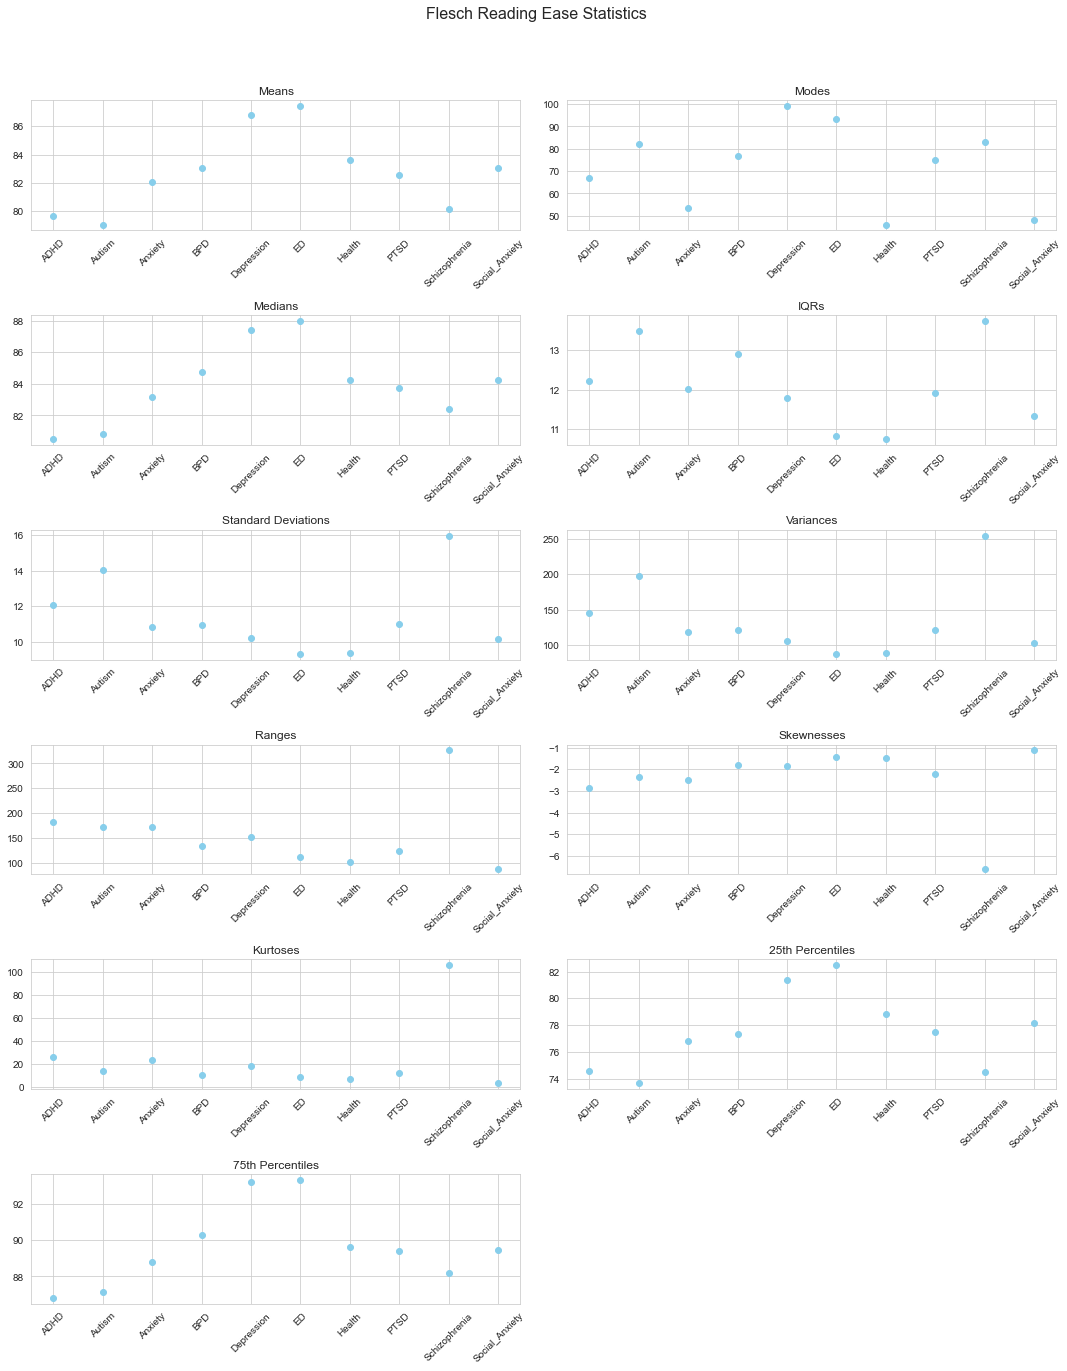

In [81]:
#Plotting:

#Plotting on a graph:

# Initialize dictionaries for each statistic
means, modes, medians, iqrs, sds, vars, ranges, skewnesses, kurtoses, percentile_25s, percentile_75s = {}, {}, {}, {}, {}, {}, {}, {}, {}, {}, {}

# Calculate and store each statistic for each dataset
for name, dataset in datasets.items():
    means[name] = dataset['flesch_reading_ease'].mean()
    modes[name] = dataset['flesch_reading_ease'].mode()[0]
    medians[name] = dataset['flesch_reading_ease'].median()
    iqrs[name] = stats.iqr(dataset['flesch_reading_ease'])
    sds[name] = dataset['flesch_reading_ease'].std()
    vars[name] = dataset['flesch_reading_ease'].var()
    ranges[name] = dataset['flesch_reading_ease'].max() - dataset['flesch_reading_ease'].min()
    skewnesses[name] = dataset['flesch_reading_ease'].skew()
    kurtoses[name] = dataset['flesch_reading_ease'].kurt()
    percentile_25s[name] = np.percentile(dataset['flesch_reading_ease'], 25)
    percentile_75s[name] = np.percentile(dataset['flesch_reading_ease'], 75)

# Function to create a scatter plot for a statistic, as before
def create_plot(ax, data, title):
    names = list(data.keys())
    values = list(data.values())
    ax.scatter(range(len(names)), values, color='skyblue')
    ax.set_xticks(range(len(names)))
    ax.set_xticklabels(names, rotation=45)
    ax.set_title(title)

# Create a 6x2 grid of subplots
fig, axs = plt.subplots(6, 2, figsize=(15, 20))
create_plot(axs[0, 0], means, "Means")
create_plot(axs[0, 1], modes, "Modes")
create_plot(axs[1, 0], medians, "Medians")
create_plot(axs[1, 1], iqrs, "IQRs")
create_plot(axs[2, 0], sds, "Standard Deviations")
create_plot(axs[2, 1], vars, "Variances")
create_plot(axs[3, 0], ranges, "Ranges")
create_plot(axs[3, 1], skewnesses, "Skewnesses")
create_plot(axs[4, 0], kurtoses, "Kurtoses")
create_plot(axs[4, 1], percentile_25s, "25th Percentiles")
create_plot(axs[5, 0], percentile_75s, "75th Percentiles")

# Remove the last (empty) subplot
fig.delaxes(axs[5, 1])

# Add a main title to the figure
fig.suptitle("Flesch Reading Ease Statistics", fontsize=16)

# Adjust layout to prevent overlap, taking into account the main title
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

plt.show()

### Gulpease Index Statistics:

In [82]:
#Numerical Stats:

for name, dataset in datasets.items():
    mean = dataset['gulpease_index'].mean()
    mode = dataset['gulpease_index'].mode()[0]  
    median = dataset['gulpease_index'].median()
    iqr = stats.iqr(dataset['gulpease_index'])
    sd = dataset['gulpease_index'].std()
    var = dataset['gulpease_index'].var()
    range_value = dataset['gulpease_index'].max() - dataset['gulpease_index'].min()
    skewness = dataset['gulpease_index'].skew()
    kurtosis = dataset['gulpease_index'].kurt()
    percentile_25 = np.percentile(dataset['gulpease_index'], 25)
    percentile_75 = np.percentile(dataset['gulpease_index'], 75)

    print(f" Gulpease Index for {name}:")
    print(f"Mean: {mean}")
    print(f"Mode: {mode}")
    print(f"Median: {median}")
    print(f"IQR: {iqr}")
    print(f"Standard Deviation: {sd}")
    print(f"Variance: {var}")
    print(f"Range: {range_value}")
    print(f"Skewness: {skewness}")
    print(f"Kurtosis: {kurtosis}")
    print(f"25th Percentile: {percentile_25}")
    print(f"75th Percentile: {percentile_75}")
    print()  

 Gulpease Index for ADHD:
Mean: 73.37899795853284
Mode: 79.0
Median: 72.6360280546327
IQR: 11.62840943550367
Standard Deviation: 10.461767872193619
Variance: 109.44858701166258
Range: 166.463768115942
Skewness: -1.1120884262542028
Kurtosis: 19.84449605164957
25th Percentile: 67.02931749622925
75th Percentile: 78.65772693173292

 Gulpease Index for Autism:
Mean: 71.94473062048992
Mode: 72.33333333333334
Median: 71.2089929742389
IQR: 11.648708010335909
Standard Deviation: 12.242889628823276
Variance: 149.88834646354854
Range: 178.93617021276594
Skewness: -0.6467573306414354
Kurtosis: 12.243458282199038
25th Percentile: 65.65555555555555
75th Percentile: 77.30426356589146

 Gulpease Index for Anxiety:
Mean: 74.73008759816626
Mode: 79.0
Median: 73.60977494446054
IQR: 10.865860949527004
Standard Deviation: 11.272418643897009
Variance: 127.0674220832769
Range: 295.0
Skewness: 3.0212218031998495
Kurtosis: 70.97479151281665
25th Percentile: 68.78051001821493
75th Percentile: 79.64637096774193


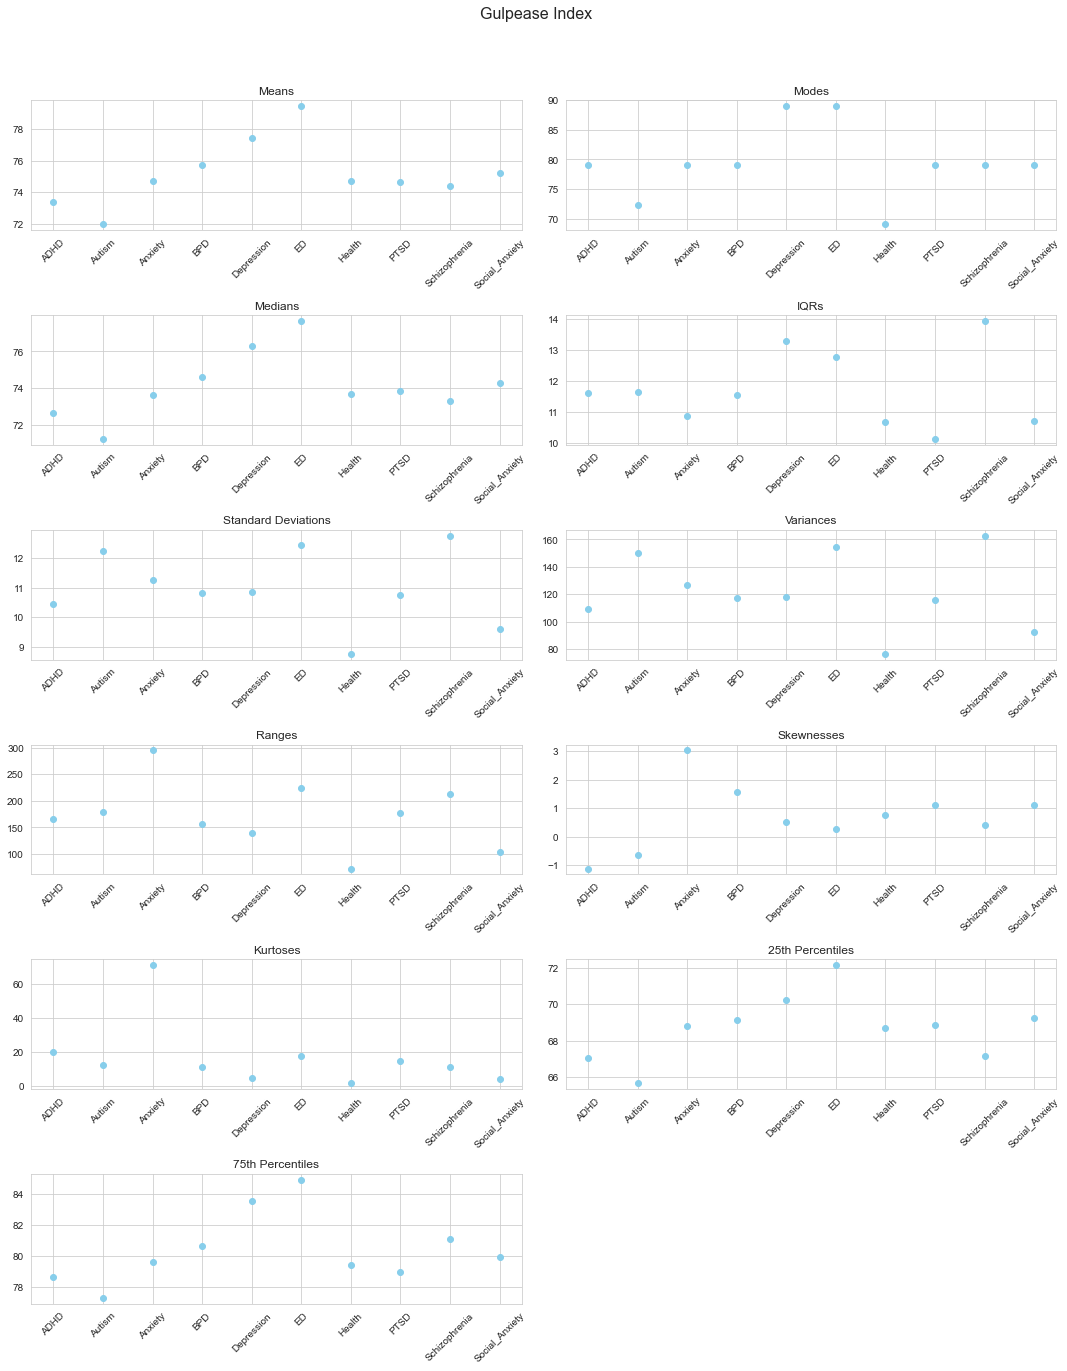

In [83]:
#Plotting:

#Plotting on a graph:

# Initialize dictionaries for each statistic
means, modes, medians, iqrs, sds, vars, ranges, skewnesses, kurtoses, percentile_25s, percentile_75s = {}, {}, {}, {}, {}, {}, {}, {}, {}, {}, {}

# Calculate and store each statistic for each dataset
for name, dataset in datasets.items():
    means[name] = dataset['gulpease_index'].mean()
    modes[name] = dataset['gulpease_index'].mode()[0]
    medians[name] = dataset['gulpease_index'].median()
    iqrs[name] = stats.iqr(dataset['gulpease_index'])
    sds[name] = dataset['gulpease_index'].std()
    vars[name] = dataset['gulpease_index'].var()
    ranges[name] = dataset['gulpease_index'].max() - dataset['gulpease_index'].min()
    skewnesses[name] = dataset['gulpease_index'].skew()
    kurtoses[name] = dataset['gulpease_index'].kurt()
    percentile_25s[name] = np.percentile(dataset['gulpease_index'], 25)
    percentile_75s[name] = np.percentile(dataset['gulpease_index'], 75)

# Function to create a scatter plot for a statistic, as before
def create_plot(ax, data, title):
    names = list(data.keys())
    values = list(data.values())
    ax.scatter(range(len(names)), values, color='skyblue')
    ax.set_xticks(range(len(names)))
    ax.set_xticklabels(names, rotation=45)
    ax.set_title(title)

# Create a 6x2 grid of subplots
fig, axs = plt.subplots(6, 2, figsize=(15, 20))
create_plot(axs[0, 0], means, "Means")
create_plot(axs[0, 1], modes, "Modes")
create_plot(axs[1, 0], medians, "Medians")
create_plot(axs[1, 1], iqrs, "IQRs")
create_plot(axs[2, 0], sds, "Standard Deviations")
create_plot(axs[2, 1], vars, "Variances")
create_plot(axs[3, 0], ranges, "Ranges")
create_plot(axs[3, 1], skewnesses, "Skewnesses")
create_plot(axs[4, 0], kurtoses, "Kurtoses")
create_plot(axs[4, 1], percentile_25s, "25th Percentiles")
create_plot(axs[5, 0], percentile_75s, "75th Percentiles")

# Remove the last (empty) subplot
fig.delaxes(axs[5, 1])

# Add a main title to the figure
fig.suptitle("Gulpease Index", fontsize=16)

# Adjust layout to prevent overlap, taking into account the main title
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

plt.show()

### Gunning Fog Index Statistics:

In [84]:
#Numerical Stats:

for name, dataset in datasets.items():
    mean = dataset['gunning_fog_index'].mean()
    mode = dataset['gunning_fog_index'].mode()[0]  
    median = dataset['gunning_fog_index'].median()
    iqr = stats.iqr(dataset['gunning_fog_index'])
    sd = dataset['gunning_fog_index'].std()
    var = dataset['gunning_fog_index'].var()
    range_value = dataset['gunning_fog_index'].max() - dataset['gunning_fog_index'].min()
    skewness = dataset['gunning_fog_index'].skew()
    kurtosis = dataset['gunning_fog_index'].kurt()
    percentile_25 = np.percentile(dataset['gunning_fog_index'], 25)
    percentile_75 = np.percentile(dataset['gunning_fog_index'], 75)

    print(f" Gunning Fog Index for {name}:")
    print(f"Mean: {mean}")
    print(f"Mode: {mode}")
    print(f"Median: {median}")
    print(f"IQR: {iqr}")
    print(f"Standard Deviation: {sd}")
    print(f"Variance: {var}")
    print(f"Range: {range_value}")
    print(f"Skewness: {skewness}")
    print(f"Kurtosis: {kurtosis}")
    print(f"25th Percentile: {percentile_25}")
    print(f"75th Percentile: {percentile_75}")
    print()  

 Gunning Fog Index for ADHD:
Mean: 8.304383114460029
Mode: 8.133333333333335
Median: 8.133333333333335
IQR: 2.9431075072108985
Standard Deviation: 2.3444286984139917
Variance: 5.496345921947123
Range: 22.379487179487178
Skewness: 0.676646779835025
Kurtosis: 2.525049633320411
25th Percentile: 6.760932171277
75th Percentile: 9.704039678487899

 Gunning Fog Index for Autism:
Mean: 8.365103234869501
Mode: 4.704761904761905
Median: 8.156598639455783
IQR: 3.075210713641334
Standard Deviation: 2.553340880098631
Variance: 6.51954964998285
Range: 21.53203252032521
Skewness: 0.5818374776857477
Kurtosis: 1.5147238105575895
25th Percentile: 6.762317271433294
75th Percentile: 9.837527985074628

 Gunning Fog Index for Anxiety:
Mean: 7.9859581413827305
Mode: 6.533333333333335
Median: 7.740500628403854
IQR: 2.786920008768641
Standard Deviation: 2.1969241066320273
Variance: 4.8264755303009315
Range: 16.919013140252076
Skewness: 0.66680753983186
Kurtosis: 1.2595811331183762
25th Percentile: 6.4580606095

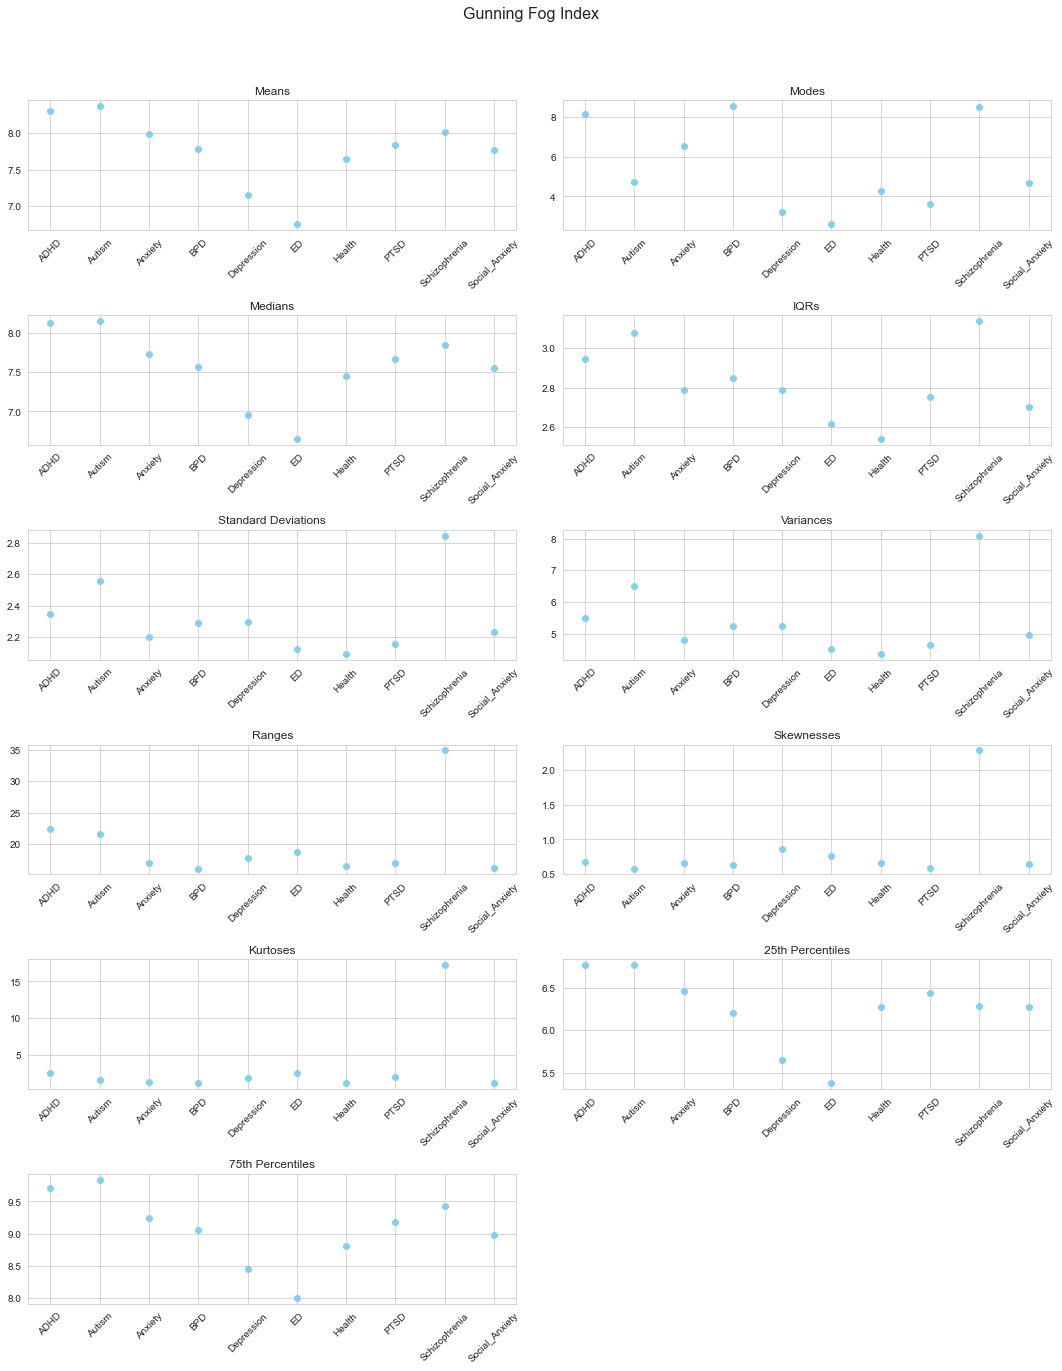

In [85]:
#Plotting:

#Plotting on a graph:

# Initialize dictionaries for each statistic
means, modes, medians, iqrs, sds, vars, ranges, skewnesses, kurtoses, percentile_25s, percentile_75s = {}, {}, {}, {}, {}, {}, {}, {}, {}, {}, {}

# Calculate and store each statistic for each dataset
for name, dataset in datasets.items():
    means[name] = dataset['gunning_fog_index'].mean()
    modes[name] = dataset['gunning_fog_index'].mode()[0]
    medians[name] = dataset['gunning_fog_index'].median()
    iqrs[name] = stats.iqr(dataset['gunning_fog_index'])
    sds[name] = dataset['gunning_fog_index'].std()
    vars[name] = dataset['gunning_fog_index'].var()
    ranges[name] = dataset['gunning_fog_index'].max() - dataset['gunning_fog_index'].min()
    skewnesses[name] = dataset['gunning_fog_index'].skew()
    kurtoses[name] = dataset['gunning_fog_index'].kurt()
    percentile_25s[name] = np.percentile(dataset['gunning_fog_index'], 25)
    percentile_75s[name] = np.percentile(dataset['gunning_fog_index'], 75)

# Function to create a scatter plot for a statistic, as before
def create_plot(ax, data, title):
    names = list(data.keys())
    values = list(data.values())
    ax.scatter(range(len(names)), values, color='skyblue')
    ax.set_xticks(range(len(names)))
    ax.set_xticklabels(names, rotation=45)
    ax.set_title(title)

# Create a 6x2 grid of subplots
fig, axs = plt.subplots(6, 2, figsize=(15, 20))
create_plot(axs[0, 0], means, "Means")
create_plot(axs[0, 1], modes, "Modes")
create_plot(axs[1, 0], medians, "Medians")
create_plot(axs[1, 1], iqrs, "IQRs")
create_plot(axs[2, 0], sds, "Standard Deviations")
create_plot(axs[2, 1], vars, "Variances")
create_plot(axs[3, 0], ranges, "Ranges")
create_plot(axs[3, 1], skewnesses, "Skewnesses")
create_plot(axs[4, 0], kurtoses, "Kurtoses")
create_plot(axs[4, 1], percentile_25s, "25th Percentiles")
create_plot(axs[5, 0], percentile_75s, "75th Percentiles")

# Remove the last (empty) subplot
fig.delaxes(axs[5, 1])

# Add a main title to the figure
fig.suptitle("Gunning Fog Index", fontsize=16)

# Adjust layout to prevent overlap, taking into account the main title
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

plt.show()

### LIX Statistics:



In [86]:
#Numerical Stats:

for name, dataset in datasets.items():
    mean = dataset['lix'].mean()
    mode = dataset['lix'].mode()[0]  
    median = dataset['lix'].median()
    iqr = stats.iqr(dataset['lix'])
    sd = dataset['lix'].std()
    var = dataset['lix'].var()
    range_value = dataset['lix'].max() - dataset['lix'].min()
    skewness = dataset['lix'].skew()
    kurtosis = dataset['lix'].kurt()
    percentile_25 = np.percentile(dataset['lix'], 25)
    percentile_75 = np.percentile(dataset['lix'], 75)

    print(f" LIX for {name}:")
    print(f"Mean: {mean}")
    print(f"Mode: {mode}")
    print(f"Median: {median}")
    print(f"IQR: {iqr}")
    print(f"Standard Deviation: {sd}")
    print(f"Variance: {var}")
    print(f"Range: {range_value}")
    print(f"Skewness: {skewness}")
    print(f"Kurtosis: {kurtosis}")
    print(f"25th Percentile: {percentile_25}")
    print(f"75th Percentile: {percentile_75}")
    print()  

 LIX for ADHD:
Mean: 28.859259577132203
Mode: 20.0
Median: 28.565105563578854
IQR: 8.574924691454413
Standard Deviation: 6.926683571401169
Variance: 47.97894529831885
Range: 67.38720538720538
Skewness: 0.8418993899086862
Kurtosis: 3.605853068297811
25th Percentile: 24.350617155537073
75th Percentile: 32.925541846991486

 LIX for Autism:
Mean: 29.62339809955544
Mode: 31.25225225225225
Median: 28.980580693815988
IQR: 9.155927161415594
Standard Deviation: 7.678350174921327
Variance: 58.95706140871438
Range: 60.5
Skewness: 0.6104307855666341
Kurtosis: 1.6708697984589764
25th Percentile: 24.835543766578244
75th Percentile: 33.99147092799384

 LIX for Anxiety:
Mean: 27.7951990057881
Mode: 32.5
Median: 27.345128301650043
IQR: 8.510406954156949
Standard Deviation: 6.707070582662334
Variance: 44.98479580081446
Range: 53.11904761904761
Skewness: 0.5008471576086061
Kurtosis: 0.9411355737640212
25th Percentile: 23.18455433455434
75th Percentile: 31.694961288711287

 LIX for BPD:
Mean: 26.976755757

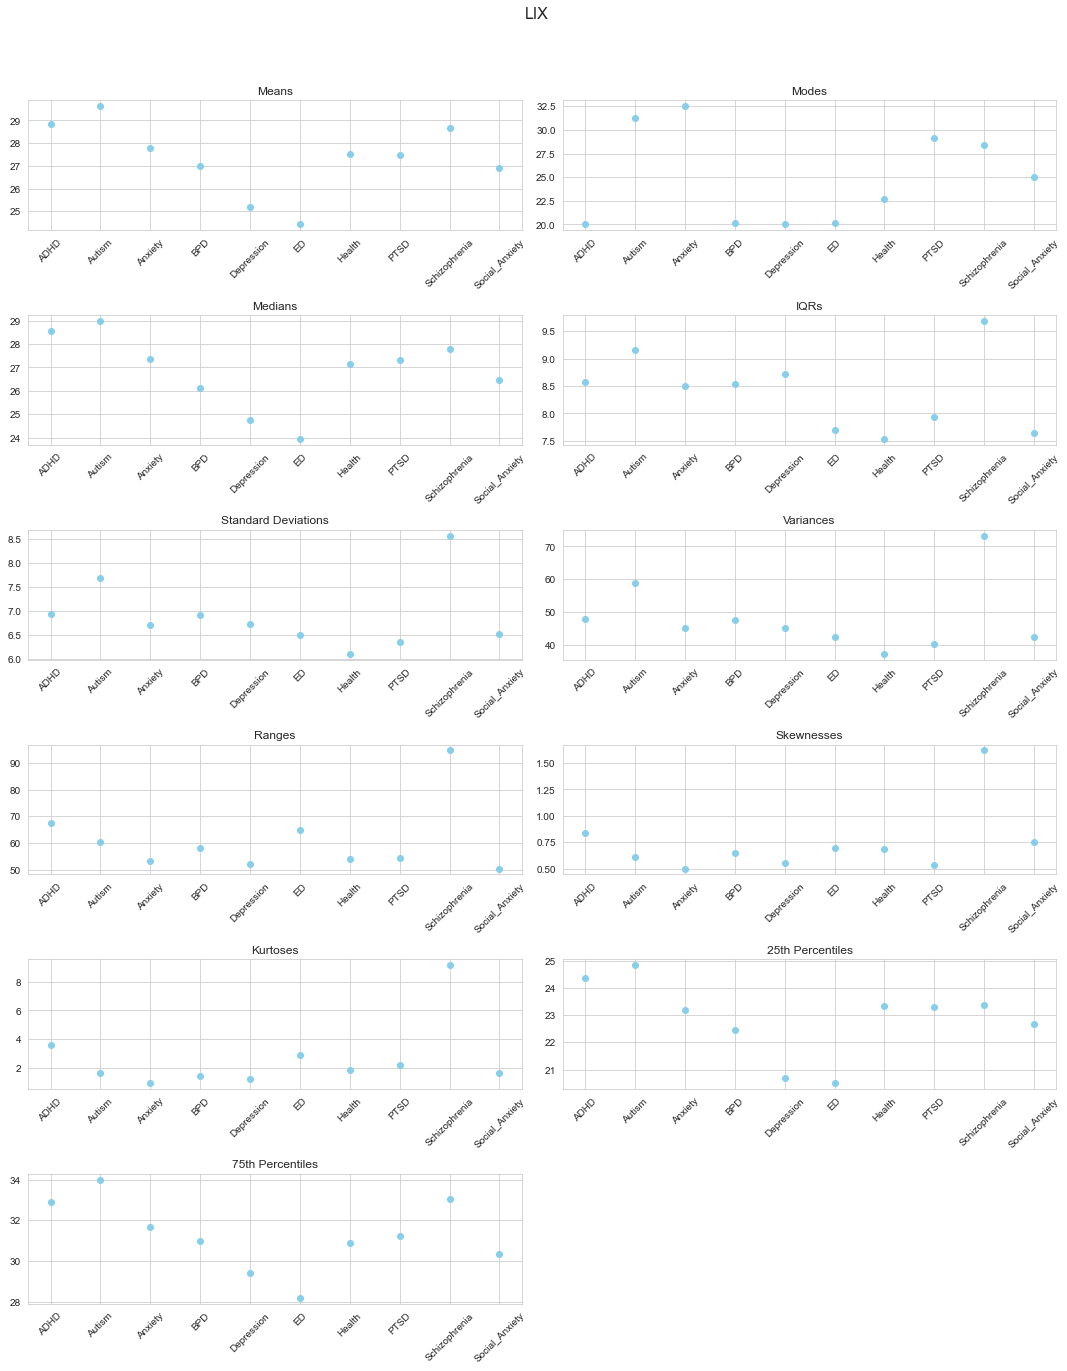

In [87]:
#Plotting:

#Plotting on a graph:

# Initialize dictionaries for each statistic
means, modes, medians, iqrs, sds, vars, ranges, skewnesses, kurtoses, percentile_25s, percentile_75s = {}, {}, {}, {}, {}, {}, {}, {}, {}, {}, {}

# Calculate and store each statistic for each dataset
for name, dataset in datasets.items():
    means[name] = dataset['lix'].mean()
    modes[name] = dataset['lix'].mode()[0]
    medians[name] = dataset['lix'].median()
    iqrs[name] = stats.iqr(dataset['lix'])
    sds[name] = dataset['lix'].std()
    vars[name] = dataset['lix'].var()
    ranges[name] = dataset['lix'].max() - dataset['lix'].min()
    skewnesses[name] = dataset['lix'].skew()
    kurtoses[name] = dataset['lix'].kurt()
    percentile_25s[name] = np.percentile(dataset['lix'], 25)
    percentile_75s[name] = np.percentile(dataset['lix'], 75)

# Function to create a scatter plot for a statistic, as before
def create_plot(ax, data, title):
    names = list(data.keys())
    values = list(data.values())
    ax.scatter(range(len(names)), values, color='skyblue')
    ax.set_xticks(range(len(names)))
    ax.set_xticklabels(names, rotation=45)
    ax.set_title(title)

# Create a 6x2 grid of subplots
fig, axs = plt.subplots(6, 2, figsize=(15, 20))
create_plot(axs[0, 0], means, "Means")
create_plot(axs[0, 1], modes, "Modes")
create_plot(axs[1, 0], medians, "Medians")
create_plot(axs[1, 1], iqrs, "IQRs")
create_plot(axs[2, 0], sds, "Standard Deviations")
create_plot(axs[2, 1], vars, "Variances")
create_plot(axs[3, 0], ranges, "Ranges")
create_plot(axs[3, 1], skewnesses, "Skewnesses")
create_plot(axs[4, 0], kurtoses, "Kurtoses")
create_plot(axs[4, 1], percentile_25s, "25th Percentiles")
create_plot(axs[5, 0], percentile_75s, "75th Percentiles")

# Remove the last (empty) subplot
fig.delaxes(axs[5, 1])

# Add a main title to the figure
fig.suptitle("LIX", fontsize=16)

# Adjust layout to prevent overlap, taking into account the main title
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

plt.show()

### SMOG Index Statistics:

In [94]:
#Numerical Stats:

for name, dataset in datasets.items():
    mean = dataset['smog_index'].mean()
    mode = dataset['smog_index'].mode()[0]  
    median = dataset['smog_index'].median()
    iqr = stats.iqr(dataset['smog_index'])
    sd = dataset['smog_index'].std()
    var = dataset['smog_index'].var()
    range_value = dataset['smog_index'].max() - dataset['smog_index'].min()
    skewness = dataset['smog_index'].skew()
    kurtosis = dataset['smog_index'].kurt()
    percentile_25 = np.percentile(dataset['smog_index'], 25)
    percentile_75 = np.percentile(dataset['smog_index'], 75)

    print(f" SMOG Index for {name}:")
    print(f"Mean: {mean}")
    print(f"Mode: {mode}")
    print(f"Median: {median}")
    print(f"IQR: {iqr}")
    print(f"Standard Deviation: {sd}")
    print(f"Variance: {var}")
    print(f"Range: {range_value}")
    print(f"Skewness: {skewness}")
    print(f"Kurtosis: {kurtosis}")
    print(f"25th Percentile: {percentile_25}")
    print(f"75th Percentile: {percentile_75}")
    print()  

 SMOG Index for ADHD:
Mean: 8.647107889792956
Mode: 8.841846274778883
Median: 8.706736193000761
IQR: 2.1714369624458234
Standard Deviation: 1.7895644153036434
Variance: 3.202540796521071
Range: 17.138238824336646
Skewness: 0.06314590354005926
Kurtosis: 2.723395983306528
25th Percentile: 7.554174236665415
75th Percentile: 9.725611199111238

 SMOG Index for Autism:
Mean: 8.65444264212865
Mode: 8.841846274778883
Median: 8.673751036733911
IQR: 2.3209877295223134
Standard Deviation: 1.9262465044616892
Variance: 3.710425595950876
Range: 13.193022398222478
Skewness: -0.023514542393315137
Kurtosis: 1.030313684257559
25th Percentile: 7.447530270364453
75th Percentile: 9.768517999886766

 SMOG Index for Anxiety:
Mean: 8.404384599731676
Mode: 8.841846274778883
Median: 8.344100000000001
IQR: 1.933259539273604
Standard Deviation: 1.618155365438315
Variance: 2.6184267866968067
Range: 11.425492549557763
Skewness: 0.033867855055540685
Kurtosis: 1.1438980843786726
25th Percentile: 7.3871296695380915
75

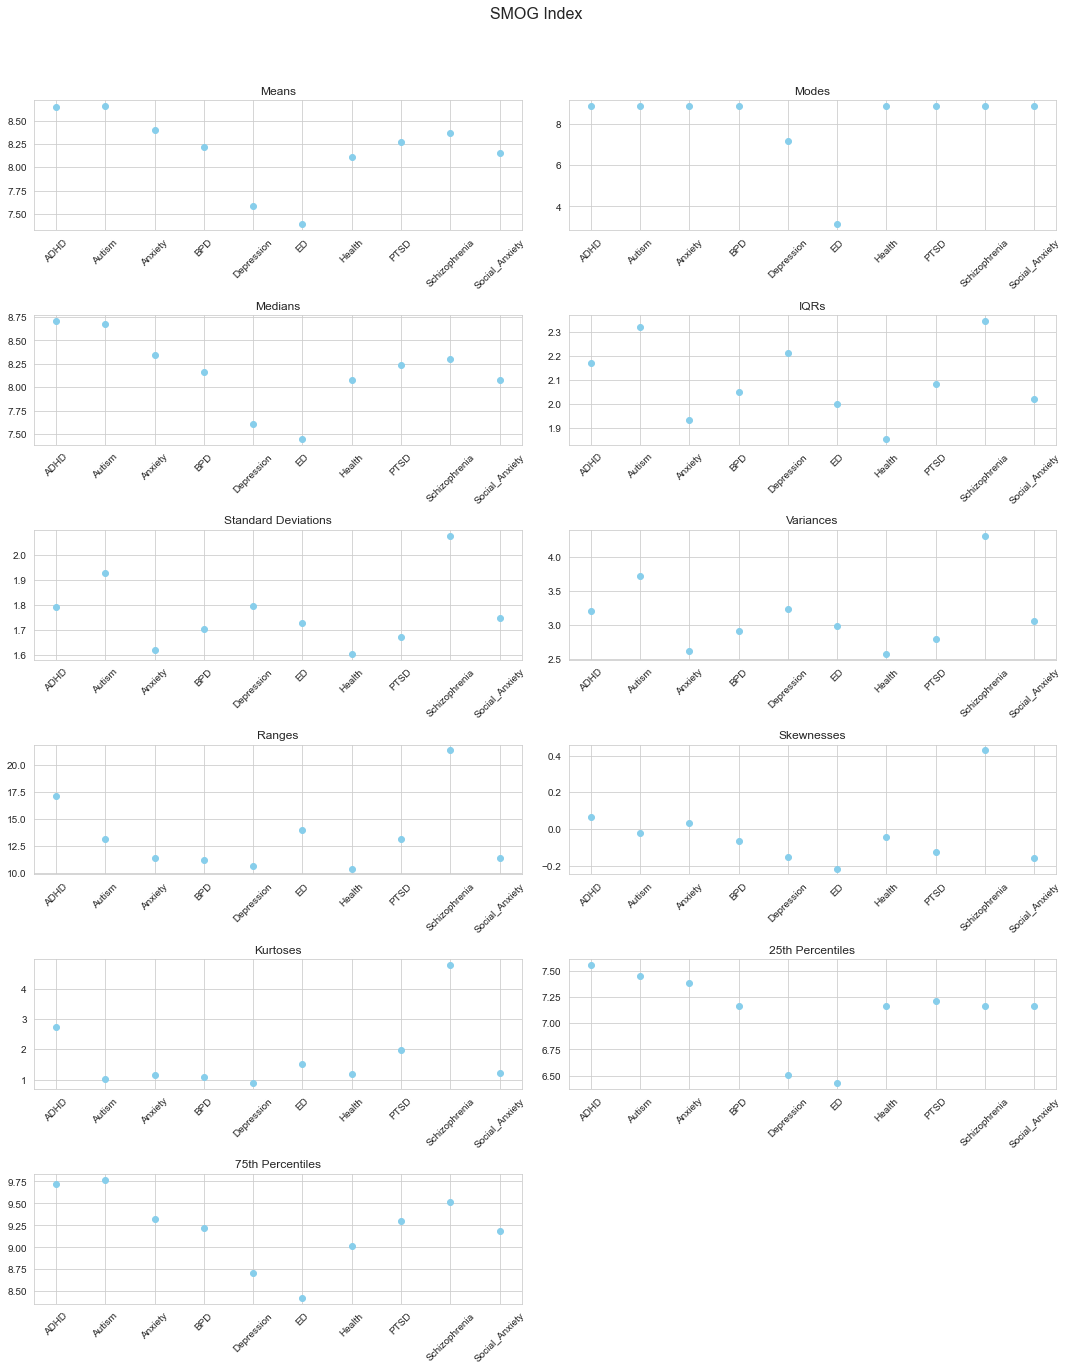

In [95]:
#Plotting:

#Plotting on a graph:

# Initialize dictionaries for each statistic
means, modes, medians, iqrs, sds, vars, ranges, skewnesses, kurtoses, percentile_25s, percentile_75s = {}, {}, {}, {}, {}, {}, {}, {}, {}, {}, {}

# Calculate and store each statistic for each dataset
for name, dataset in datasets.items():
    means[name] = dataset['smog_index'].mean()
    modes[name] = dataset['smog_index'].mode()[0]
    medians[name] = dataset['smog_index'].median()
    iqrs[name] = stats.iqr(dataset['smog_index'])
    sds[name] = dataset['smog_index'].std()
    vars[name] = dataset['smog_index'].var()
    ranges[name] = dataset['smog_index'].max() - dataset['smog_index'].min()
    skewnesses[name] = dataset['smog_index'].skew()
    kurtoses[name] = dataset['smog_index'].kurt()
    percentile_25s[name] = np.percentile(dataset['smog_index'], 25)
    percentile_75s[name] = np.percentile(dataset['smog_index'], 75)

# Function to create a scatter plot for a statistic, as before
def create_plot(ax, data, title):
    names = list(data.keys())
    values = list(data.values())
    ax.scatter(range(len(names)), values, color='skyblue')
    ax.set_xticks(range(len(names)))
    ax.set_xticklabels(names, rotation=45)
    ax.set_title(title)

# Create a 6x2 grid of subplots
fig, axs = plt.subplots(6, 2, figsize=(15, 20))
create_plot(axs[0, 0], means, "Means")
create_plot(axs[0, 1], modes, "Modes")
create_plot(axs[1, 0], medians, "Medians")
create_plot(axs[1, 1], iqrs, "IQRs")
create_plot(axs[2, 0], sds, "Standard Deviations")
create_plot(axs[2, 1], vars, "Variances")
create_plot(axs[3, 0], ranges, "Ranges")
create_plot(axs[3, 1], skewnesses, "Skewnesses")
create_plot(axs[4, 0], kurtoses, "Kurtoses")
create_plot(axs[4, 1], percentile_25s, "25th Percentiles")
create_plot(axs[5, 0], percentile_75s, "75th Percentiles")

# Remove the last (empty) subplot
fig.delaxes(axs[5, 1])

# Add a main title to the figure
fig.suptitle("SMOG Index", fontsize=16)

# Adjust layout to prevent overlap, taking into account the main title
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

plt.show()

### Wiener Sacht Text Formel:

In [96]:
#Numerical Stats:

for name, dataset in datasets.items():
    mean = dataset['wiener_sachtextformel'].mean()
    mode = dataset['wiener_sachtextformel'].mode()[0]  
    median = dataset['wiener_sachtextformel'].median()
    iqr = stats.iqr(dataset['wiener_sachtextformel'])
    sd = dataset['wiener_sachtextformel'].std()
    var = dataset['wiener_sachtextformel'].var()
    range_value = dataset['wiener_sachtextformel'].max() - dataset['wiener_sachtextformel'].min()
    skewness = dataset['wiener_sachtextformel'].skew()
    kurtosis = dataset['wiener_sachtextformel'].kurt()
    percentile_25 = np.percentile(dataset['wiener_sachtextformel'], 25)
    percentile_75 = np.percentile(dataset['wiener_sachtextformel'], 75)

    print(f" Wiener Sacht Form Index for {name}:")
    print(f"Mean: {mean}")
    print(f"Mode: {mode}")
    print(f"Median: {median}")
    print(f"IQR: {iqr}")
    print(f"Standard Deviation: {sd}")
    print(f"Variance: {var}")
    print(f"Range: {range_value}")
    print(f"Skewness: {skewness}")
    print(f"Kurtosis: {kurtosis}")
    print(f"25th Percentile: {percentile_25}")
    print(f"75th Percentile: {percentile_75}")
    print()  

 Wiener Sacht Form Index for ADHD:
Mean: 2.391019209601199
Mode: 1.2105230769230777
Median: 2.3321406410256404
IQR: 2.0040095084667797
Standard Deviation: 1.7361432359371274
Variance: 3.0141933356902397
Range: 17.62188433048433
Skewness: 1.141589932240214
Kurtosis: 5.246625196035147
25th Percentile: 1.268721209050996
75th Percentile: 3.272730717517776

 Wiener Sacht Form Index for Autism:
Mean: 2.4830500301498533
Mode: -0.3786500000000004
Median: 2.337814525343937
IQR: 2.1685540514181385
Standard Deviation: 1.9006758384959455
Variance: 3.612568643042265
Range: 15.32631428571429
Skewness: 0.7420265835639006
Kurtosis: 1.7482321518072728
25th Percentile: 1.265701378446115
75th Percentile: 3.434255429864254

 Wiener Sacht Form Index for Anxiety:
Mean: 2.093569812038042
Mode: 2.6402
Median: 1.9657748645566007
IQR: 1.9983327479415884
Standard Deviation: 1.6080252997433393
Variance: 2.585745364614656
Range: 13.446161904761905
Skewness: 0.5395717149252773
Kurtosis: 0.7864324408949548
25th Perc

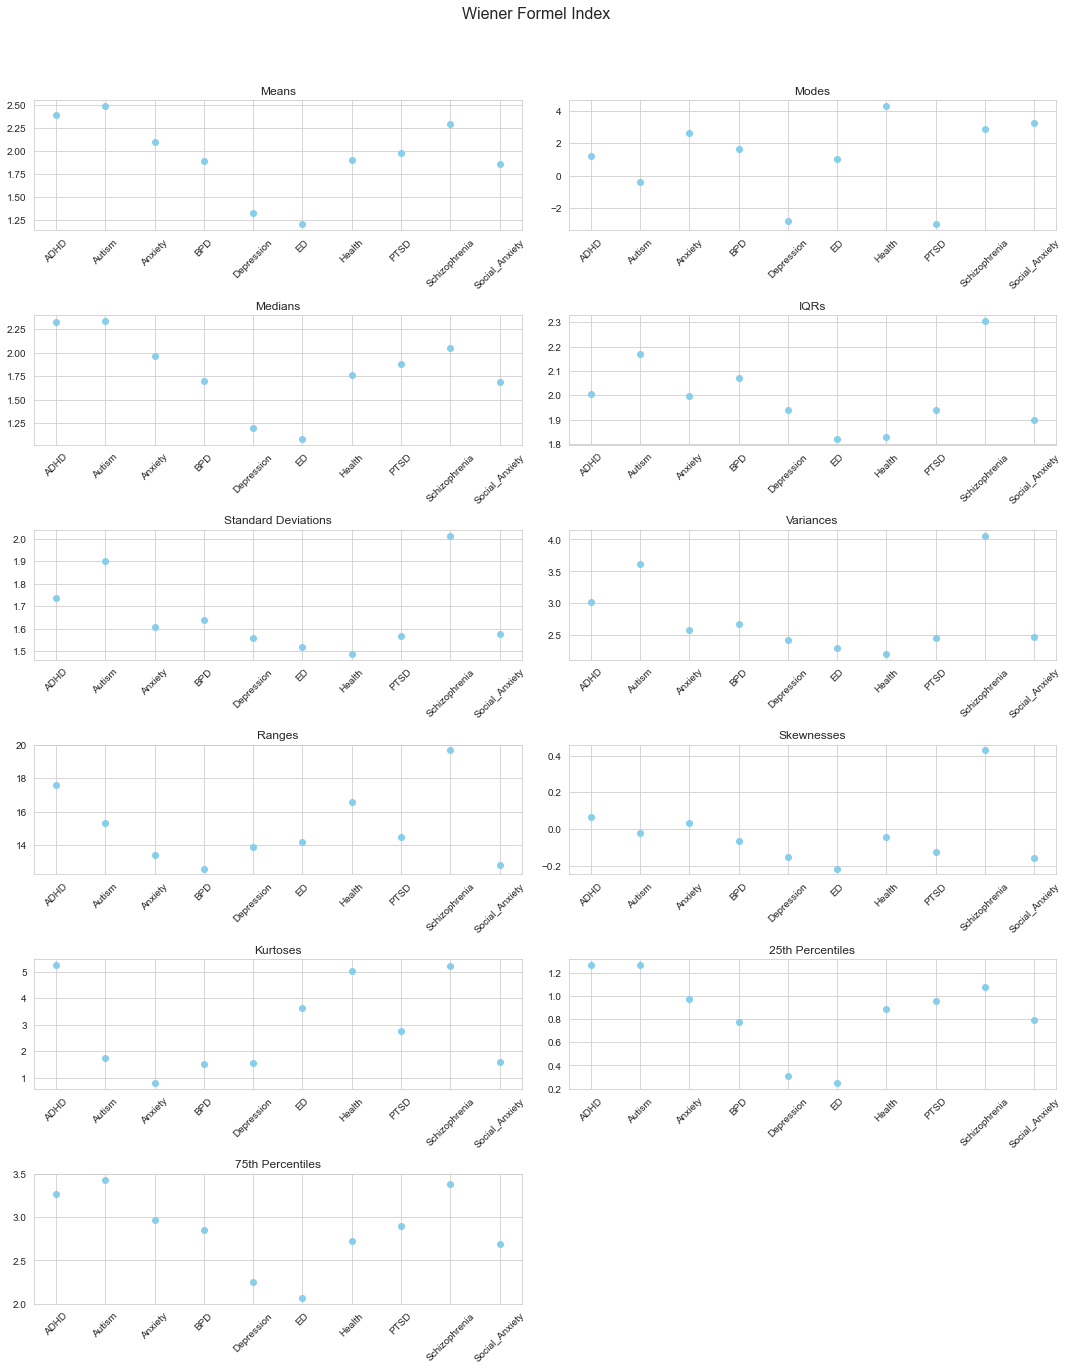

In [97]:
#Plotting:

#Plotting on a graph:

# Initialize dictionaries for each statistic
means, modes, medians, iqrs, sds, vars, ranges, skewnesses, kurtoses, percentile_25s, percentile_75s = {}, {}, {}, {}, {}, {}, {}, {}, {}, {}, {}

# Calculate and store each statistic for each dataset
for name, dataset in datasets.items():
    means[name] = dataset['wiener_sachtextformel'].mean()
    modes[name] = dataset['wiener_sachtextformel'].mode()[0]
    medians[name] = dataset['wiener_sachtextformel'].median()
    iqrs[name] = stats.iqr(dataset['wiener_sachtextformel'])
    sds[name] = dataset['wiener_sachtextformel'].std()
    vars[name] = dataset['wiener_sachtextformel'].var()
    ranges[name] = dataset['wiener_sachtextformel'].max() - dataset['wiener_sachtextformel'].min()
    skewnesses[name] = dataset['smog_index'].skew()
    kurtoses[name] = dataset['wiener_sachtextformel'].kurt()
    percentile_25s[name] = np.percentile(dataset['wiener_sachtextformel'], 25)
    percentile_75s[name] = np.percentile(dataset['wiener_sachtextformel'], 75)

# Function to create a scatter plot for a statistic, as before
def create_plot(ax, data, title):
    names = list(data.keys())
    values = list(data.values())
    ax.scatter(range(len(names)), values, color='skyblue')
    ax.set_xticks(range(len(names)))
    ax.set_xticklabels(names, rotation=45)
    ax.set_title(title)

# Create a 6x2 grid of subplots
fig, axs = plt.subplots(6, 2, figsize=(15, 20))
create_plot(axs[0, 0], means, "Means")
create_plot(axs[0, 1], modes, "Modes")
create_plot(axs[1, 0], medians, "Medians")
create_plot(axs[1, 1], iqrs, "IQRs")
create_plot(axs[2, 0], sds, "Standard Deviations")
create_plot(axs[2, 1], vars, "Variances")
create_plot(axs[3, 0], ranges, "Ranges")
create_plot(axs[3, 1], skewnesses, "Skewnesses")
create_plot(axs[4, 0], kurtoses, "Kurtoses")
create_plot(axs[4, 1], percentile_25s, "25th Percentiles")
create_plot(axs[5, 0], percentile_75s, "75th Percentiles")

# Remove the last (empty) subplot
fig.delaxes(axs[5, 1])

# Add a main title to the figure
fig.suptitle("Wiener Formel Index", fontsize=16)

# Adjust layout to prevent overlap, taking into account the main title
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

plt.show()

**Above collated the usual statistics for the different langauge grade levels for the different mental disorders.**